# Dogs vs Cats

In this section of the notebook, our objective is to build a convolutional neural network (CNN) model capable of distinguishing between dog and cat images using the TensorFlow library. A CNN is a powerful deep-learning algorithm specifically designed for image classification tasks. By leveraging its ability to learn hierarchical representations, we can effectively sort and classify images based on their content.

## Importing libraries

In [9]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers
import matplotlib.pyplot as plt

## Creating the convolutional model

The model is initialized as a Sequential model using `models.Sequential()`. The first layer added to the model is a Conv2D layer with 16 filters of size 2x2 pixels. The activation function used is ReLU, and the input shape is specified as (150,150,3), representing images with dimensions 150x150 pixels and 3 color channels (RGB).

After the Conv2D layer, a BatchNormalization layer is added to normalize the activations and improve model stability. Next, a MaxPooling2D layer with a pool size of 2x2 is added to downsample the feature maps and reduce spatial dimensions. This pattern of adding Conv2D, BatchNormalization, and MaxPooling2D layers is repeated twice with different filter sizes (32 and 64), aiming to extract higher-level features from the input images.

After the last Conv2D layer, a Dropout layer with a rate of 0.5 is added to randomly deactivate 50% of the neurons, reducing overfitting. Another MaxPooling2D layer follows the Dropout layer, further downsampling the feature maps.

Another Conv2D layer with 64 filters is added, along with BatchNormalization. This time, a Dropout layer with a rate of 0.3 is applied to mitigate overfitting. After the final Dropout layer, a Flatten layer is added to convert the 2D feature maps into a 1D vector, preparing the data for the fully connected layers. Another Dropout layer with a rate of 0.5 is introduced to regularize the fully connected layers. A Dense layer with 256 units and ReLU activation is added to learn complex patterns from the flattened features.

Finally, the output layer consists of a Dense layer with a single unit and a sigmoid activation function, suitable for binary classification tasks. To summarize the model's architecture, the `model.summary()` function is called, providing a concise summary of the model's layers, their output shapes, and the total number of parameters.


In [2]:
model = models.Sequential()

model.add(Conv2D(16, (2,2), activation= 'relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 149, 149, 16)      208       
                                                                 
 batch_normalization (BatchN  (None, 149, 149, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 73, 73, 32)        2080      
                                                                 
 batch_normalization_1 (Batc  (None, 73, 73, 32)       128       
 hNormalization)                                                 
                                                        

## Data augmentation

These lines of code define an `ImageDataGenerator` object called `train_datagen`, which is used for data augmentation during training. Data augmentation is a technique commonly used in computer vision tasks to increase the diversity and variability of the training data, thus improving the model's ability to generalize and handle different scenarios. Let's break down the parameters and their effects:

1. `rescale=1./255`: This parameter rescales the pixel values of the images by dividing them by 255. By doing this, the pixel values are normalized to the range [0, 1]. Normalizing the pixel values helps the model converge faster during training.

2. `rotation_range=40`: This parameter specifies a range (in degrees) within which random rotations can be applied to the images. Randomly rotating the images by a certain degree helps the model become invariant to rotational variations in the input data.

3. `width_shift_range=0.2` and `height_shift_range=0.2`: These parameters allow for randomly shifting the width and height dimensions of the images by a fraction of the total width and height, respectively. This technique introduces variations in the position of objects within the image, making the model more robust to different object locations.

4. `shear_range=0.2`: This parameter applies shearing transformations to the images. Shearing transforms the shape of the image by shifting the position of pixels along a certain direction. Applying random shearing helps the model learn to recognize objects even when they are distorted or skewed.

5. `zoom_range=0.2`: This parameter allows for randomly zooming into the images by a factor specified within the range [1 - zoom_range, 1 + zoom_range]. Randomly zooming helps the model learn to focus on different parts of the image and handle variations in object size.

6. `horizontal_flip=True`: This parameter enables random horizontal flipping of the images. Flipping the images horizontally introduces mirror images into the training data, enhancing the model's ability to handle objects from different orientations.

By applying these augmentation techniques, the `ImageDataGenerator` generates augmented versions of the training images on-the-fly during model training. This increases the diversity and variability of the training data, enabling the model to learn more robust and generalized representations.

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Rescaling the data

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [6]:
checkpoint = ModelCheckpoint('dogs_and_cats_model.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compiling the model

In [7]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

## Training the model

In [8]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])

Epoch 1/100


2023-05-26 03:02:47.797207: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


62/62 [==============================] - ETA: 0s - loss: 1.1251 - accuracy: 0.5554
Epoch 1: val_accuracy improved from -inf to 0.49798, saving model to dogs_and_cats_model.hdf5
62/62 [==============================] - 47s 577ms/step - loss: 1.1251 - accuracy: 0.5554 - val_loss: 1.8926 - val_accuracy: 0.4980
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.6123
Epoch 2: val_accuracy improved from 0.49798 to 0.50101, saving model to dogs_and_cats_model.hdf5
62/62 [==============================] - 17s 274ms/step - loss: 0.6609 - accuracy: 0.6123 - val_loss: 2.7846 - val_accuracy: 0.5010
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.6250
Epoch 3: val_accuracy did not improve from 0.50101
62/62 [==============================] - 16s 259ms/step - loss: 0.6412 - accuracy: 0.6250 - val_loss: 2.5920 - val_accuracy: 0.5010
Epoch 4/100
62/62 [==============================] - ETA: 0s - loss: 0.6264 - accuracy: 0

## Results

In [9]:
import matplotlib.pyplot as plt

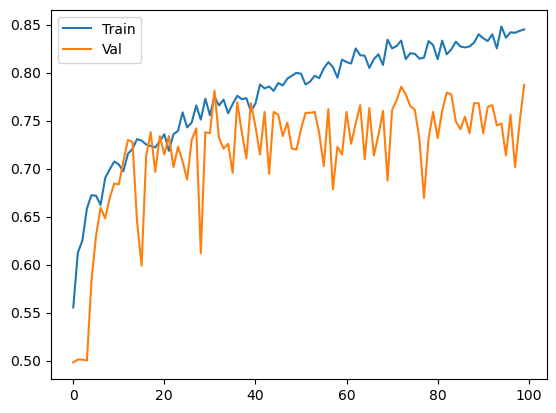

In [10]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [12]:
model2 = model 

In [13]:
model2.load_weights('./dogs_and_cats_model.hdf5')

In the following lines we can observe two quantities of paramount importance to evaluate our model:

Loss: The loss value (0.7679) represents the average loss incurred by the model during the evaluation process. It is a measure of how well the model's predictions match the true labels. A lower loss value indicates better performance, where 0 represents perfect predictions.

Accuracy: The accuracy value (0.7730) represents the proportion of correctly classified samples in the test dataset. It is a common evaluation metric for classification tasks and provides an overall measure of the model's performance. An accuracy of 1.0 denotes perfect classification, while lower values indicate less accurate predictions

In [14]:
model2.evaluate(test_generator)

32/32 [==============================] - 9s 279ms/step - loss: 0.7679 - accuracy: 0.7730


[0.7678831219673157, 0.7730000019073486]

## Conclusion

Initially, the model was constructed without Dropout layers and featured twice as many neurons in each layer, resulting in an accuracy of 80%. To enhance the model's performance, modifications were made, including the addition of Dropout layers and adjustments to the number of neurons. However, it is clear that further modifications are required in the model's architecture, data generation techniques, and possibly the number of neurons in order to achieve improved accuracy. Experimenting with different architectural variations, exploring advanced data augmentation methods, and fine-tuning the hyperparameters could potentially lead to enhanced accuracy. Continuous refinement and experimentation are crucial to optimize the model's performance.